# Run the whole deltas algorithm

In [49]:
%load_ext autoreload
%autoreload 2

import ipywidgets
from deltas.pipeline import data, classifier, evaluation
from deltas.model import base, downsample
import deltas.plotting.plots as plots

import numpy as np
np.random.seed(10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [50]:
N1 = 1000
N2 = 10
m = 1
costs = (1, 1)  # change for (1, 10) to increase results
# Gaussian (not always seperable)
data_clf = data.get_data(
    m1=[-m, -m],
    m2=[m, m],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=True
    )

## Get Classifier

/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Original


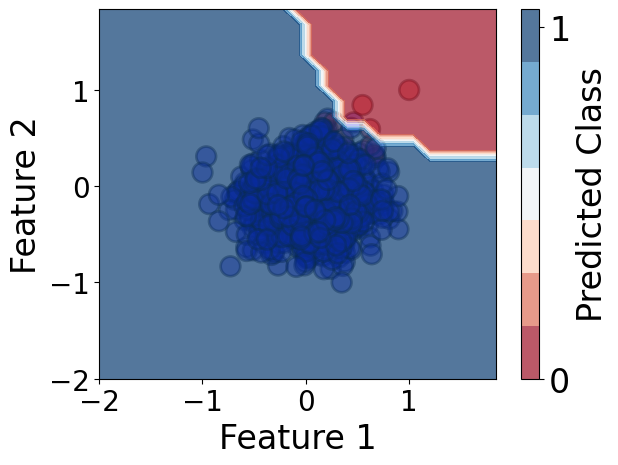

SMOTE


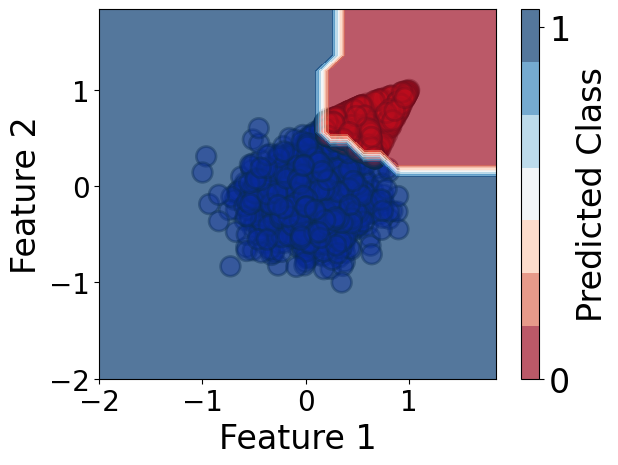

Balanced Weights


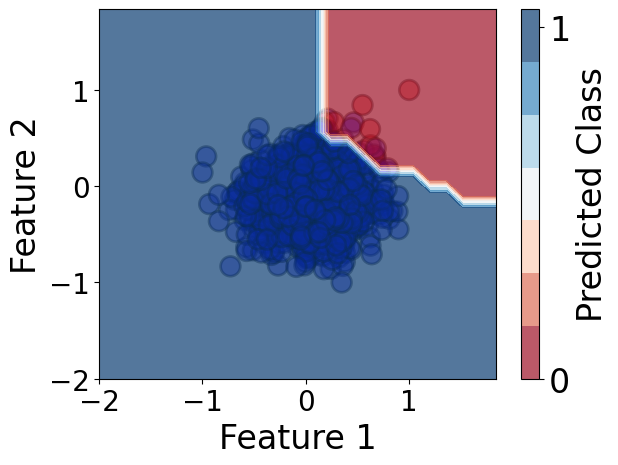

Bayes Minimum Risk (calibrated)


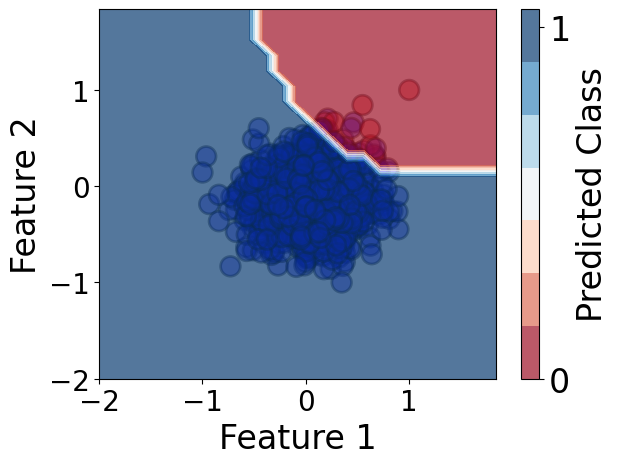

Bayes Minimum Risk


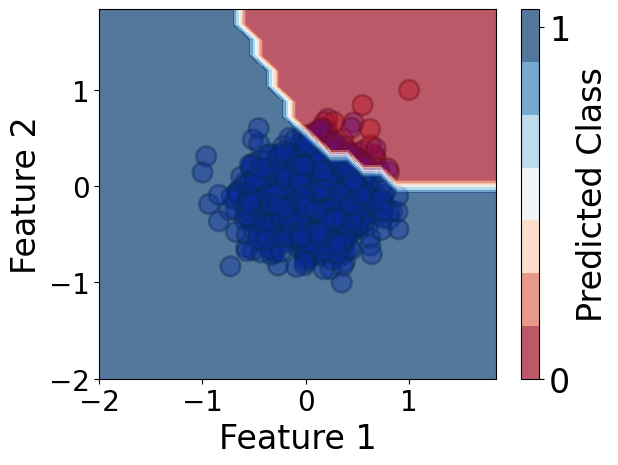

Thresholding


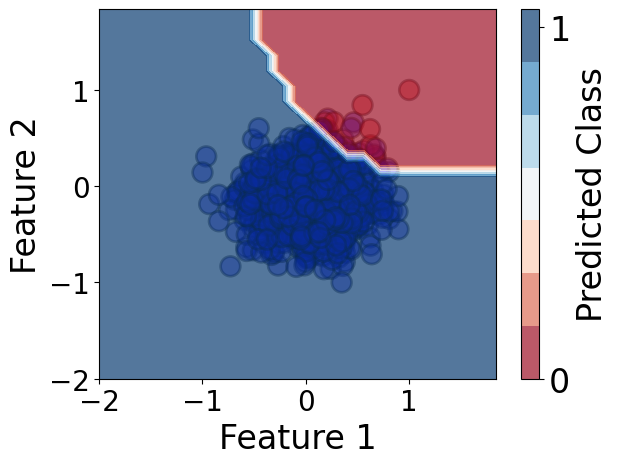

In [51]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
model = 'MLP'

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)
data_clf['clf'] = classifiers_dict['Original']                    

## Fit deltas

Original Data


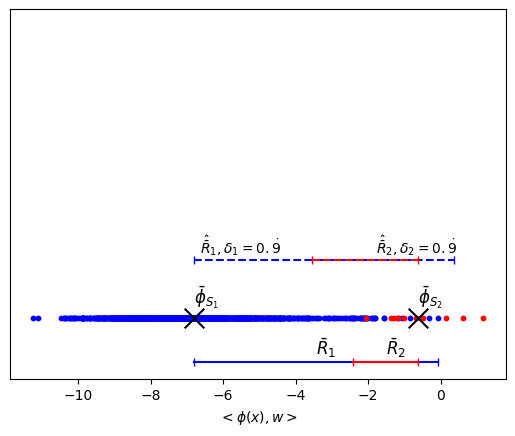

Budget 505 found 354 viable downsampled solutions
Best solution found by removing 107 data points
Downsampled Data:


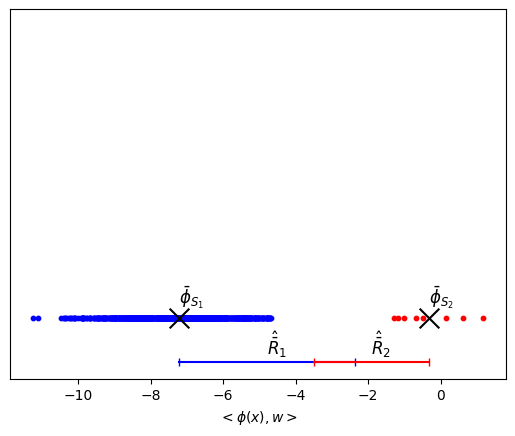

In [52]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = downsample.downsample_deltas(
#     clf).fit(X, y, _print=True, _plot=True, max_trials=10000)
# deltas_model = base.base_deltas(
#     clf).fit(X, y, grid_search=True, _print=True, _plot=True)
deltas_model = downsample.downsample_deltas(
    clf).fit(X, y, costs=costs, _print=True, _plot=True, grid_search=True)

## Plot training data information

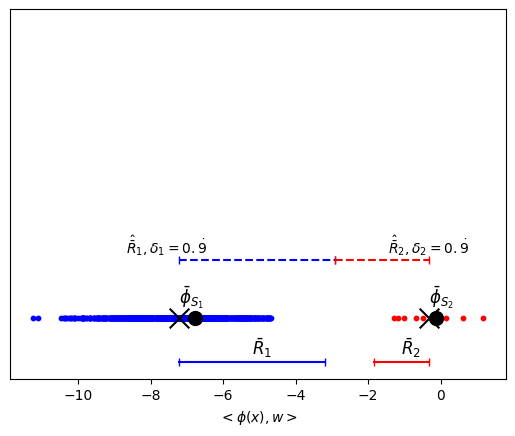

In [53]:
deltas_model.plot_data(data_clf)

## See how classifier's boudnary changes with delta

In [54]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [55]:
deltas_model.print_params()

Parameters
                R:  11.254718483416363
                N1: 895
                N2: 8
                R1: 4.030388506243637
                R2: 1.515642533260831
                M:  1.3468354582375441
                D:  6.892866497742012
                C1: 10
                C2: 1


# Evaluation on test data

                                 Accuracy    G-Mean  ROC-AUC        F1
Method                                                                
Original                          0.70315  0.637835  0.70315  0.578368
SMOTE                             0.83485  0.821163  0.83485  0.805580
Balanced Weights                  0.84955  0.838504  0.84955  0.825757
Bayes Minimum Risk (calibrated)   0.86020  0.851633  0.86020  0.840938
Bayes Minimum Risk                0.89405  0.891069  0.89405  0.885713
Thresholding                      0.86020  0.851633  0.86020  0.840938
Our Method                        0.89415  0.891210  0.89415  0.885882 


Original


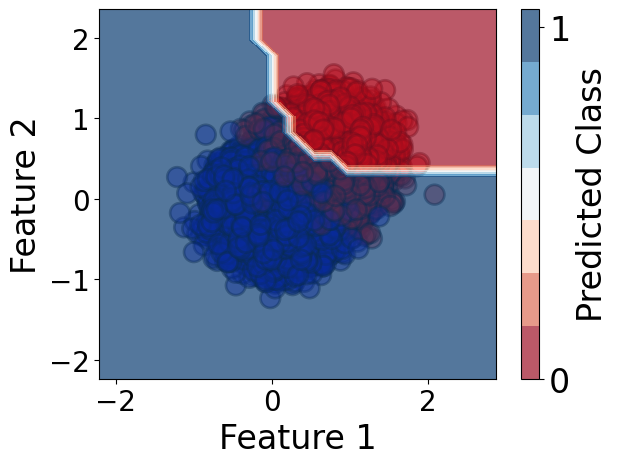

SMOTE


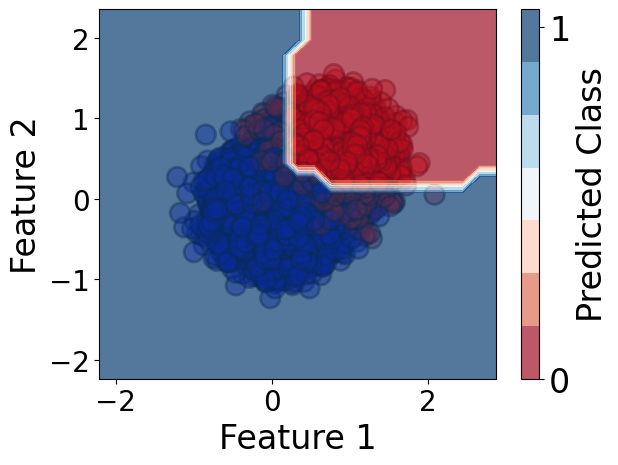

Balanced Weights


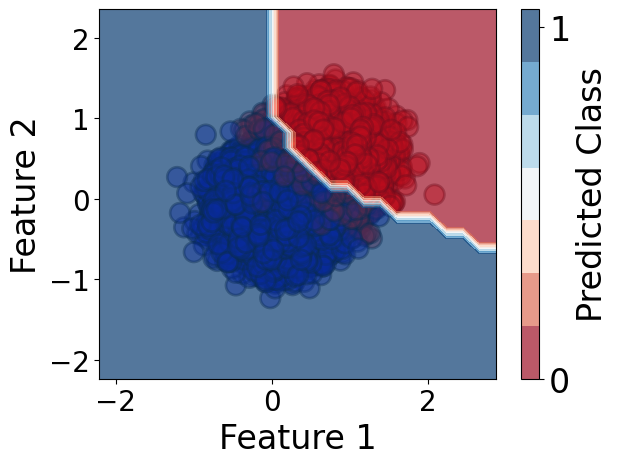

Bayes Minimum Risk (calibrated)


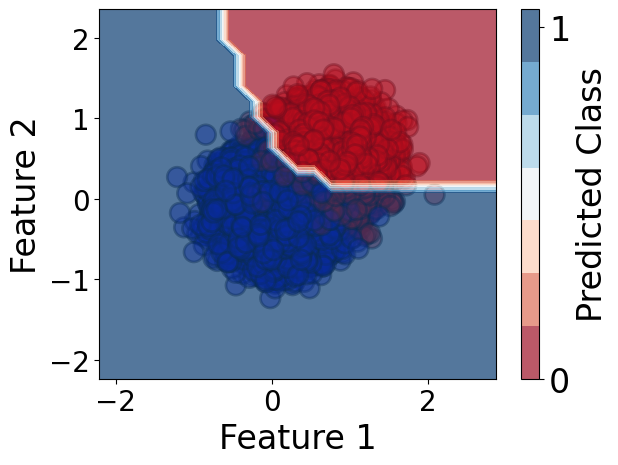

Bayes Minimum Risk


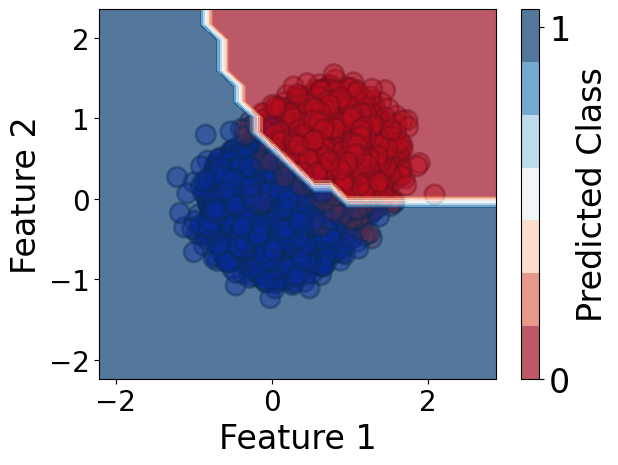

Thresholding


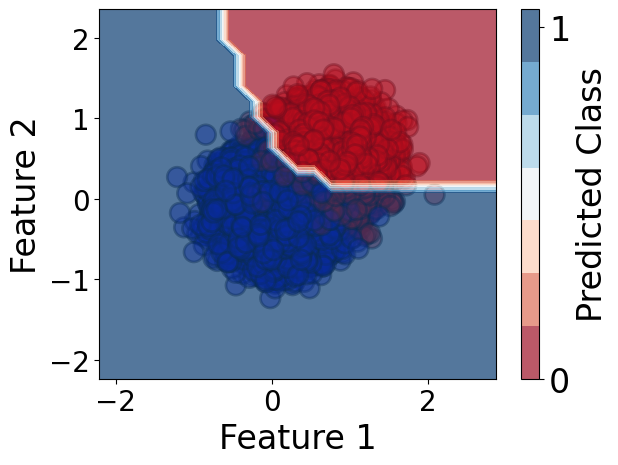

Our Method


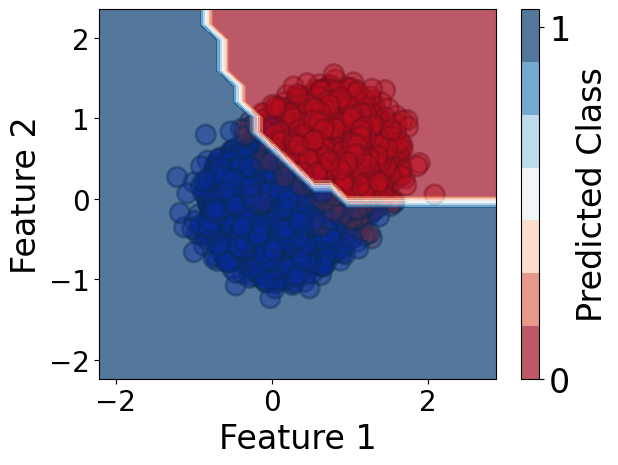

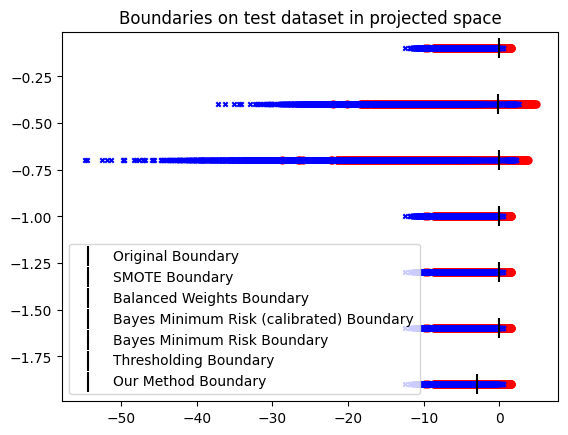

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Original & 0.7032 & 0.6378 & 0.7032 & 0.5784 \\
SMOTE & 0.8348 & 0.8212 & 0.8349 & 0.8056 \\
Balanced Weights & 0.8496 & 0.8385 & 0.8496 & 0.8258 \\
Bayes Minimum Risk (calibrated) & 0.8602 & 0.8516 & 0.8602 & 0.8409 \\
Bayes Minimum Risk & 0.8941 & 0.8911 & 0.8940 & 0.8857 \\
Thresholding & 0.8602 & 0.8516 & 0.8602 & 0.8409 \\
Our Method & 0.8942 & 0.8912 & 0.8941 & 0.8859 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Original,0.70315,0.637835,0.70315,0.578368
SMOTE,0.83485,0.821163,0.83485,0.805580
Balanced Weights,0.84955,0.838504,0.84955,0.825757
Bayes Minimum Risk (calibrated),0.86020,0.851633,0.86020,0.840938
Bayes Minimum Risk,0.89405,0.891069,0.89405,0.885713
Thresholding,0.86020,0.851633,0.86020,0.840938
Our Method,0.89415,0.891210,0.89415,0.885882


In [56]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)